In [1]:
from keras.preprocessing import image
import numpy as np
from keras import models,layers
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import models
from keras.models import load_model
from tensorflow.keras.utils import plot_model
import keras

In [7]:
# Define image size and batch size
image_size = (224, 224)
model = load_model('dataset/binary_classification_model.h5')
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_22 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,122,435 (30.98 MB)

 Trainable params: 8,122,433 (30.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

(1, 224, 224, 3)


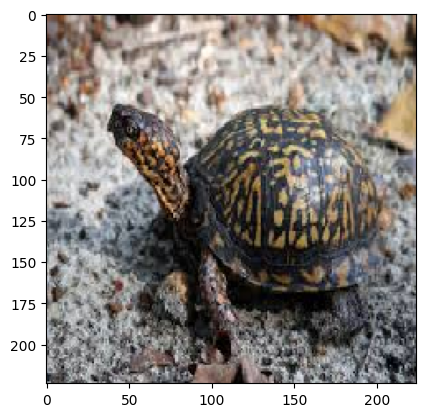

In [85]:
#Lets slow things down a bit and visualize a single image and explore feature maps
#CNNs are not black bloxes like their counterparts they are actually quite interpretable due to their representations of visual concepts
img_path = "dataset/val/image.png"
#preprocess image into a tensor
img = image.load_img(img_path, target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255. #This is how the model was trained on input data

print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


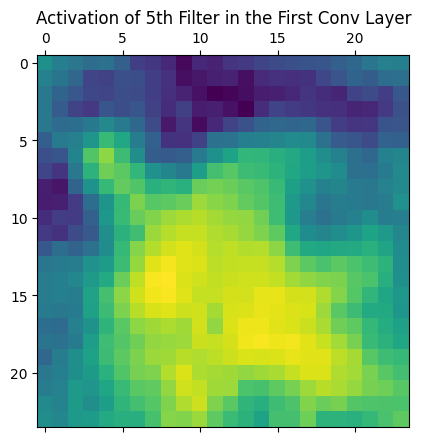

In [75]:
_ = model.predict(img_tensor) 

# Step 2: Explicitly create a new Input layer to ensure proper graph building
input_layer = keras.Input(shape=(224, 224, 3))  # Create a new Input layer
x = input_layer

# Step 3: Reconnect the first 8 layers manually to this new input
for layer in model.layers[:8]:
    x = layer(x)

# Create the new model using this manually connected input and output
activation_model = models.Model(inputs=input_layer, outputs=x)

# Step 4: Get the activations for the single image
activations = activation_model.predict(img_tensor)

# Step 5: Visualize the activations for the first layer
first_layer_activation = activations  # Since we're only looking at one layer

# Plot the activations of one of the filters in the first layer
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.title("Activation of 5th Filter in the First Conv Layer")
plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


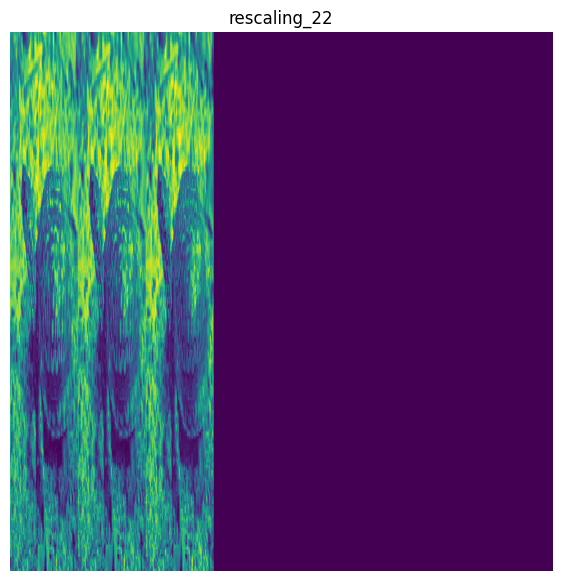

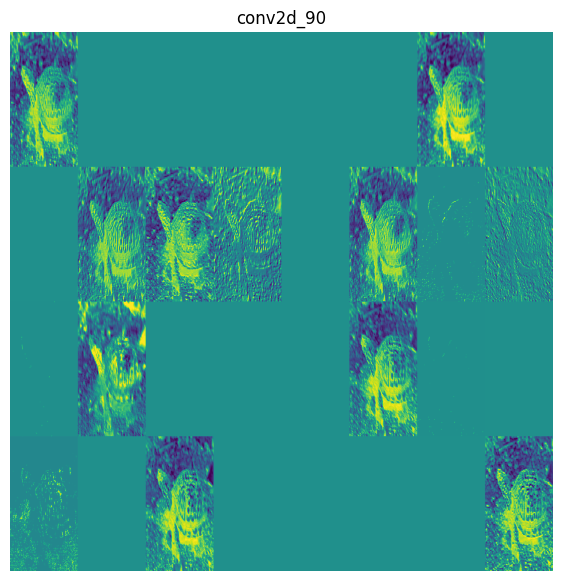

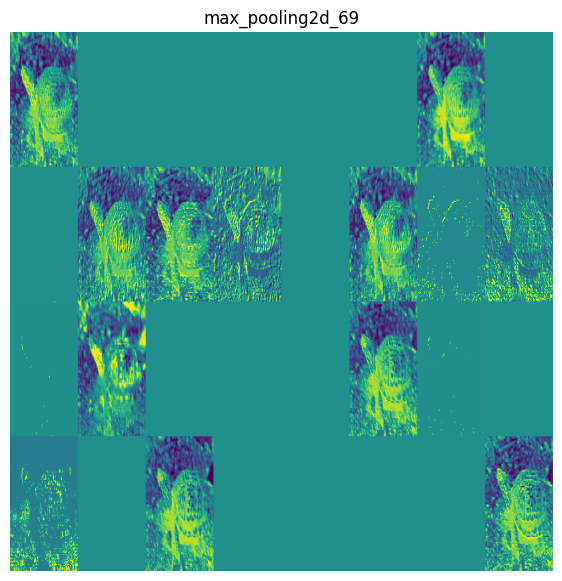

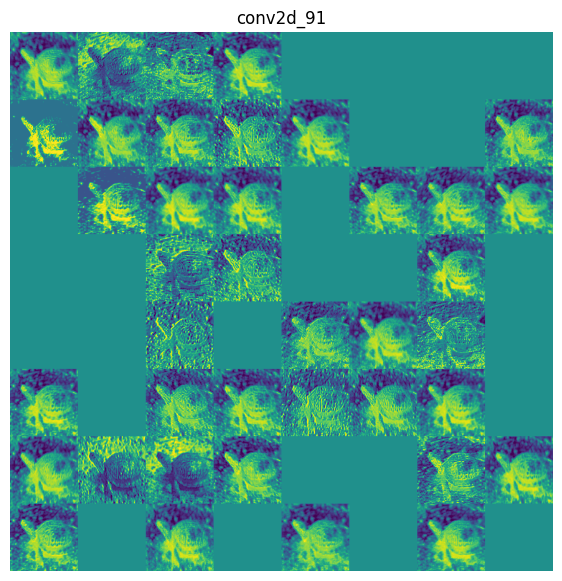

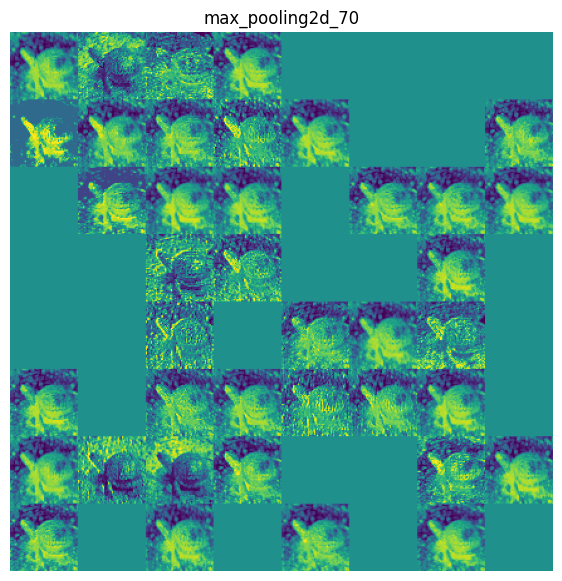

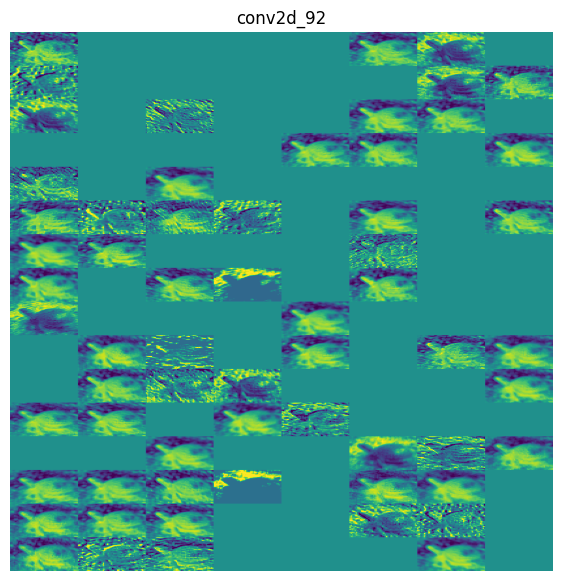

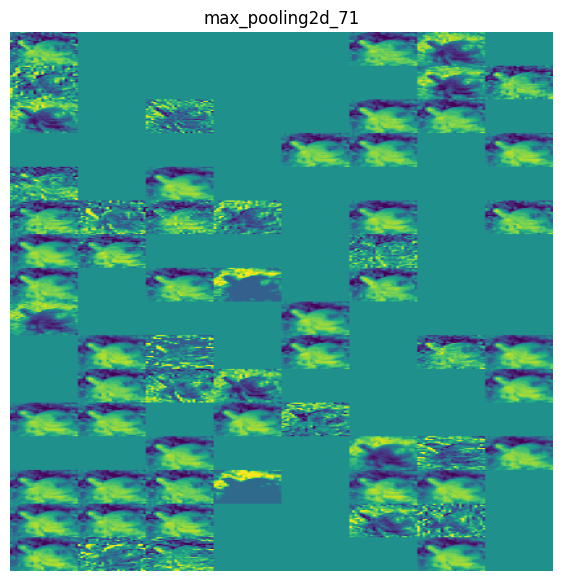

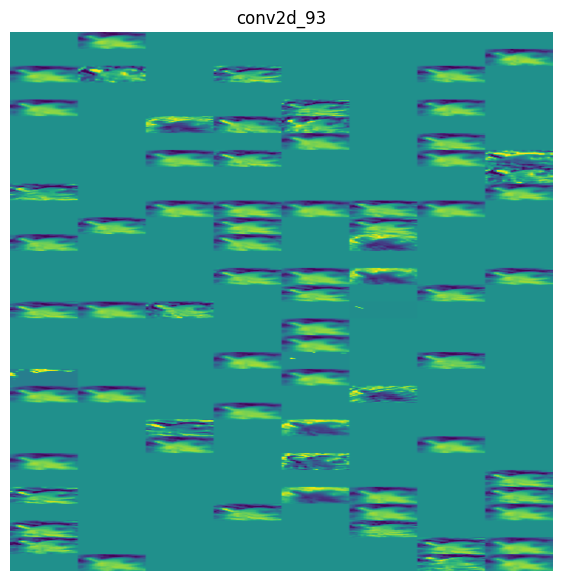

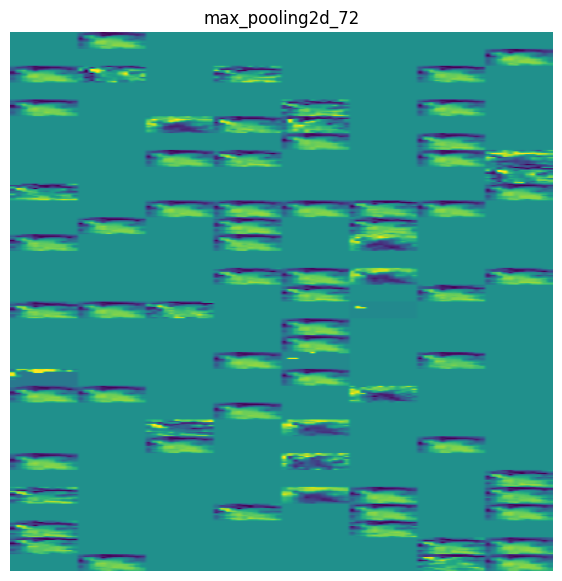

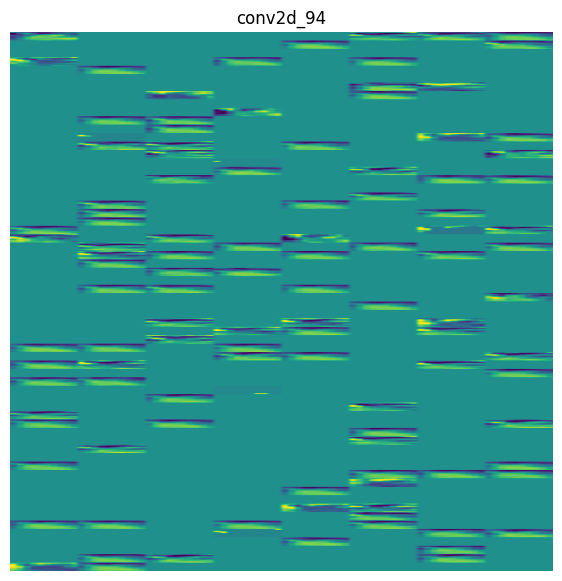

In [90]:
input_layer = keras.Input(shape=(224, 224, 3))
x = input_layer

# Reconnect all layers manually
layer_outputs = []
for layer in model.layers:
    x = layer(x)
    layer_outputs.append(x)

# Create the intermediate model
activation_model = models.Model(inputs=input_layer, outputs=layer_outputs)

# Get activations for each layer in the model
activations = activation_model.predict(img_tensor)

# Visualize convolutional layers only in a structured grid format
layer_names = [layer.name for layer in model.layers]

for layer_name, layer_activation in zip(layer_names, activations):
    if len(layer_activation.shape) == 4:  # Only visualize convolutional layers
        n_features = layer_activation.shape[-1]  # Number of feature maps (channels)
        size = layer_activation.shape[1]         # Height and width of feature map

        # Determine the number of rows and columns for the grid
        n_cols = 8  # Use 8 columns for the grid layout
        n_rows = n_features // n_cols + (1 if n_features % n_cols != 0 else 0)  # Calculate rows needed

        # Create a display grid for the activations
        display_grid = np.zeros((size * n_rows, size * n_cols))  # Empty grid for feature maps

        # Iterate through each feature map and place it in the grid
        for row in range(n_rows):
            for col in range(n_cols):
                filter_index = row * n_cols + col  # Calculate index of the filter
                if filter_index < n_features:  # Check if within feature count
                    # Extract the filter and normalize for display
                    channel_image = layer_activation[0, :, :, filter_index]
                    channel_image -= channel_image.mean()  # Zero-center
                    channel_image /= (channel_image.std() + 1e-5)  # Standardize
                    channel_image *= 64
                    channel_image += 128
                    channel_image = np.clip(channel_image, 0, 255).astype('uint8')  # Clip to [0, 255]

                    # Place each feature map channel in the display grid
                    display_grid[row * size : (row + 1) * size,
                                 col * size : (col + 1) * size] = channel_image

        # Display the grid of feature maps for this layer
        plt.figure(figsize=(7, 7))
        plt.title(layer_name)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.axis('off')
        plt.show()


